Import the data that was stored after the matchms processing:

In [1]:
import os
import numpy as np
from matchms.importing import load_from_json

path_data = os.path.join(os.path.dirname(os.getcwd()), "matchms_tutorial") #"..." enter your pathname to the downloaded file
file_json = os.path.join(path_data, "GNPS-NIH-NATURALPRODUCTSLIBRARY_processed.json")
spectrums = list(load_from_json(file_json))

**1. Load a pretrained Spec2Vec model**

For many use-cases we would not advice to retrain a new model from scratch. Instead a more general model that has been trained on a large MS/MS dataset can simply be loaded and used to calculate similarities, even for spectra which were not part of the initial model training.
Here we can download a model trained on about 95,000 spectra from GNPS (positive ionmode) which can be downloaded from here: https://zenodo.org/record/4173596/files/spec2vec_AllPositive_ratio05_filtered_201101_iter_15.model?download=1
https://zenodo.org/record/4173596/files/spec2vec_AllPositive_ratio05_filtered_201101_iter_15.model.trainables.syn1neg.npy?download=1
https://zenodo.org/record/4173596/files/spec2vec_AllPositive_ratio05_filtered_201101_iter_15.model.wv.vectors.npy?download=1


Now let’s import this model.

In [2]:
import gensim

path_model = os.path.join(os.path.dirname(os.getcwd()),
                          "matchms_tutorial") 
                           # enter your path name when different
filename_model = "spec2vec_AllPositive_ratio05_filtered_201101_iter_15.model"
filename = os.path.join(path_model, filename_model)

model = gensim.models.Word2Vec.load(filename)

It is very important to make sure that the “documents” are created the same way as for the model training. This mostly comes down here to the number of decimals which needs to be the same here than for the pretrained model. To inspect the words the model has learned, we can look at **model.wv.vocab** which is the "vocabulary" the model has learned. Let’s for instance see how a word looks like:

In [3]:
next(iter(model.wv.vocab))

'peak@289.29'

use gensim 3.8.0! Otherwise look at https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4 for the changes!

**CALCULATE SPECTRUM SIMILARITIES**

With both spectrums and a trained model we can start computing Spec2Vec spectrum similarities. First, we will initialize Spec2Vec by running:

In [4]:
from spec2vec import Spec2Vec

spec2vec_similarity = Spec2Vec(model=model,
                               intensity_weighting_power=0.5,
                               allowed_missing_percentage=5.0)

Apart from using the before loaded **model** we here set two parameters. The model itself will convert spectrum peaks (here: “words”) into abstract vectors (“embeddings”) which are then added up to give us a spectrum embedding. The parameter **intensity_weighting_power** defines by what power of its intensity we scale each word vector, usually we use 0.5. The **allowed_missing_percentage** specifies what percentage of a spectrum is allowed to be unknown to the used model.

Let’s now compute some actual S|pec2Vec spectrum similarities, for instance between for all possible pairs within our list of spectrums by running:

In [5]:
from matchms.filtering import default_filters
from matchms.filtering import normalize_intensities
from matchms.filtering import select_by_intensity
from matchms.filtering import select_by_mz
from matchms.filtering import default_filters
from matchms.filtering import repair_inchi_inchikey_smiles
from matchms.filtering import derive_inchikey_from_inchi
from matchms.filtering import derive_smiles_from_inchi
from matchms.filtering import derive_inchi_from_smiles
from matchms.filtering import harmonize_undefined_inchi
from matchms.filtering import harmonize_undefined_inchikey
from matchms.filtering import harmonize_undefined_smiles

def metadata_processing(spectrum):
    spectrum = default_filters(spectrum)
    spectrum = repair_inchi_inchikey_smiles(spectrum)
    spectrum = derive_inchi_from_smiles(spectrum)
    spectrum = derive_smiles_from_inchi(spectrum)
    spectrum = derive_inchikey_from_inchi(spectrum)
    spectrum = harmonize_undefined_smiles(spectrum)
    spectrum = harmonize_undefined_inchi(spectrum)
    spectrum = harmonize_undefined_inchikey(spectrum)
    return spectrum

def peak_processing(spectrum):
    spectrum = default_filters(spectrum)
    spectrum = normalize_intensities(spectrum)
    spectrum = select_by_intensity(spectrum, intensity_from=0.01)
    spectrum = select_by_mz(spectrum, mz_from=10, mz_to=1000)
    return spectrum

spectrums = [metadata_processing(s) for s in spectrums]
spectrums = [peak_processing(s) for s in spectrums]

Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2R)-2-[3-[(10aS)-1,3-dioxo-10,10a-dihydro-5H-imidazo[1,5-b]isoquinolin-2-yl]propanoylamino]-2-phenylacetic acid"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2S)-3-benzoyl-2,7b-dihydro-1aH-oxireno[2,3-c]quinoline-2-carbonitrile"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 5-hydroxy-7-methoxy-2-phenylchromen-4-one
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: N-[2-[7-methoxy-6-[(Z)-(2,4,6-trioxo-1-prop-2-enyl-1,3-diazinan-5-ylidene)methyl]-1,3-benzodioxol-5-yl]ethyl]-N-methylbenzamide"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2S)-2-[[(2S)-3-methyl-2-[[(2S)-3-oxo-2-propan-2-yl-2,4-dihydroquinoxaline-1-carbonyl]amino]butanoyl]amino]-3-phenylpropanoic acid"
Remove

Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2S)-2-[[2-(3-hexyl-4-methyl-2-oxochromen-7-yl)oxyacetyl]amino]-3-phenylpropanoic acid
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2R)-2-[[(2R)-2-[[1-[(2-methylpropan-2-yl)oxycarbonyl]-4-phenylpiperidine-4-carbonyl]amino]propanoyl]amino]-2-phenylacetic acid
Removed adduct M+Na from compound name.
Added adduct [M+Na]+ to metadata.
Added cleaned compound name: (2R)-2-[[(2R)-2-[[1-[(2-methylpropan-2-yl)oxycarbonyl]-4-phenylpiperidine-4-carbonyl]amino]propanoyl]amino]-2-phenylacetic acid
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+Na from compound name.
Added adduct [M+Na]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 7-hydroxy-3-phenylchromen-4-one
Removed adduc

Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 4,9-dimethoxyfuro[3,2-g]chromen-7-one"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 4-[[[2-(4-butyl-8-methyl-2-oxochromen-7-yl)oxyacetyl]amino]methyl]cyclohexane-1-carboxylic acid
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 3-(4-chlorophenyl)-2-[[2-[(4-methyl-6-oxo-7,8,9,10-tetrahydrobenzo[c]chromen-3-yl)oxy]acetyl]amino]propanoic acid"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.


Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2S)-3-(1H-indol-3-yl)-2-[[(2S)-4-methyl-2-[(3-oxo-2,4-dihydroquinoxaline-1-carbonyl)amino]pentanoyl]amino]propanoic acid"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: N-[2-(5-methoxy-1H-indol-3-yl)ethyl]-2-(2-oxo-4-propylchromen-7-yl)oxyacetamide
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 2-(1,3-benzodioxol-5-yl)-1-methylquinolin-4-one"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2S)-1-[(2S)-5-amino-2-[[(2S)-2-(2,4-dioxo-1H-quinazolin-3-yl)-3-phenylpropanoyl]amino]-5-oxopentanoyl]pyrrolidine-2-carboxylic acid"
Remove

Added cleaned compound name: (2R)-1-[(2S)-2-[[(2S)-2-(2,4-dioxo-1H-quinazolin-3-yl)-3-phenylpropanoyl]amino]-3-methylbutanoyl]pyrrolidine-2-carboxylic acid"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+Na from compound name.
Added adduct [M+Na]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 1-[2-(4-butyl-2-oxochromen-7-yl)oxyacetyl]piperidine-4-carboxamide
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: methyl 1-[1-[(2S)-3-methyl-2-[(4-methylphenyl)sulfonylamino]pentanoyl]piperidine-4-carbonyl]piperidine-4-carboxylate
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (3S,5R,8R,9S,10S,13S,14S)-3-hydroxy-10,13-dimethyl-1,2,3,4,5,6,7,8,9,11,12,14,15,16-tetradecahydrocyclopenta[a]phenanthren-17-one"
Removed adduct M+H 

Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: [2-(1H-indol-3-yl)-2-oxoethyl] acetate
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: tert-butyl N-[(2S)-4-methylsulfanyl-1-oxo-1-[4-[[(2S)-1-oxo-1-(1-phenylethylamino)propan-2-yl]carbamoyl]piperidin-1-yl]butan-2-yl]carbamate
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2R)-1-[2-(4-ethyl-7-methyl-2-oxochromen-5-yl)oxyacetyl]pyrrolidine-2-carboxylic acid
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: N-[(2-methoxyphenyl)methy

RDKit WARNING: [14:59:15] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:15] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:15] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:16] WARNING: Omitt

Added cleaned compound name: (3R)-N-cyclopentyl-6,7-dimethoxy-2,2-dimethyl-5-oxo-3,9b-dihydro-[1,3]thiazolo[2,3-a]isoindole-3-carboxamide"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 2-[2-(3-ethyl-4,8-dimethyl-2-oxochromen-7-yl)oxypropanoylamino]-3-(5-hydroxy-1H-indol-3-yl)propanoic acid"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 7-hydroxy-5-methyl-2-(2-oxopropyl)-8-[3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]chromen-4-one"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 1-[(2S)-2-amino-3-phenylpropanoyl]-N-[(2S)-1-(4-ethylanilino)-1-oxopropan-2-yl]piperidine-4-carboxamide
Removed adduct M+H from compound name.
Added a

Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2S)-2-[2-[(6-oxo-7,8,9,10-tetrahydrobenzo[c]chromen-3-yl)oxy]propanoylamino]-3-phenylpropanoic acid"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: N-[(2S)-1-[(2-amino-2-oxoethyl)amino]-4-methyl-1-oxopentan-2-yl]-1-[1-(4-methylphenyl)sulfonylpiperidine-4-carbonyl]pyrrolidine-2-carboxamide
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2S)-1-[2-[(4-butyl-8,8-dimethyl-2-oxo-9,10-d

Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2S)-3-(1H-indol-3-yl)-2-[[2-(4-methyl-6-oxobenzo[c]chromen-3-yl)oxyacetyl]amino]propanoic acid
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 1-[2-(7-methyl-2-oxo-4-propylchromen-5-yl)oxyacetyl]piperidine-4-carboxamide
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (3S)-N-[(2S)-3-(1H-indol-3-yl)-1-(4-methoxyanilino)-1-oxopropan-2-yl]-1,2,3,4-tetrahydroisoquinoline-3-carboxamide"


Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2S)-N-(1,3-benzodioxol-5-yl)-5-oxo-1-(3-oxo-1H-2-benzofuran-1-yl)pyrrolidine-2-carboxamide"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 2-[[1-[(2S)-3-methyl-2-[(4-methylphenyl)sulfonylamino]butanoyl]piperidine-4-carbonyl]amino]heptanoic acid
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 1,2,3,4,6,7,8,9-octahydrophenazine"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 2-amino-3-(1H-indol-3-yl)-N-phenylpropanamide
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (7S)-7-amino-10-hydroxy-1,2,3-trimethoxy-6,7-dihydro-5H-benzo[a]heptalen-9-one"
Removed adduct M+H from compound

Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 3-(3,5-dimethyl-7-oxofuro[3,2-g]chromen-6-yl)-N-[3-(2-oxopyrrolidin-1-yl)propyl]propanamide"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 7-[2-[(4aS,8aS)-4a-hydroxy-1,3,4,5,6,7,8,8a-octahydroisoquinolin-2-yl]-2-oxoethoxy]chromen-2-one"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 2-(3,4-dihydroxyphenyl)-5,7-dihydroxy-6-[3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]chromen-4-one"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 4-[[2-(4-butyl-6-chloro-2-oxochromen-7-yl)oxypropanoylamino]methyl]cyclohexane-1-carboxylic acid
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Remo

Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 1-[2-(2-oxochromen-7-yl)oxyacetyl]piperidine-4-carboxamide
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (E)-1-(2-hydroxy-4-methoxyphenyl)-3-phenylprop-2-en-1-one
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 5,7-dihydroxy-2-(4-hydroxyphenyl)-6,8-bis(3-methylbut-2-enyl)-2,3-dihydrochromen-4-one"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleane

RDKit WARNING: [14:59:17] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:17] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:17] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:17] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:17] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:17] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:17] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:17] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:17] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:18] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:18] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:18] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:18] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:18] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:18] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:18] WARNING: Omitted undefined stereo
RDKit WARNING: [14:59:18] WARNING: Omitt

Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: tert-butyl (2S)-2-[4-[[(2S)-1-[(4-methylphenyl)methylamino]-1-oxopropan-2-yl]carbamoyl]piperidine-1-carbonyl]pyrrolidine-1-carboxylate
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 1-[2-(4-methyl-6-oxobenzo[c]chromen-3-yl)oxyacetyl]piperidine-4-carboxylic acid
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2S)-2-[[2-(4-butyl-2-oxochromen-7-yl)oxyacetyl]amino]-3-phenylpropanoic acid
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound nam

Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: N-benzyl-2-[(4,8,8-trimethyl-2-oxo-9,10-dihydropyrano[2,3-h]chromen-5-yl)oxy]acetamide"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 4-[[[2-[4-(4-methoxyphenyl)-2-oxochromen-7-yl]oxyacetyl]amino]methyl]cyclohexane-1-carboxylic acid
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 1-[2-(3,4,7-trimethyl-2-oxochromen-5-yl)oxyacetyl]piperidine-4-carboxamide"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 3-(diethylamino)propyl 2,2-diphenylacetate"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned

Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 2-[2-(4-butyl-7-methyl-2-oxochromen-5-yl)oxypropanoylamino]-3-(5-hydroxy-1H-indol-3-yl)propanoic acid
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 1-[(2S)-2-amino-4-methylsulfanylbutanoyl]-N-[(2S)-1-[(4-methoxyphenyl)methylamino]-1-oxopropan-2-yl]piperidine-4-carboxamide
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: (2R)-2-[[(2S)-3-methyl-2-[(3-oxo-2,4-dihydroquinoxaline-1-carbonyl)amino]butanoyl]amino]-3-phenylpropanoic acid"
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Added cleaned compound name: 
Removed adduct M+H from compound name.
Added adduct

In [6]:
from matchms import calculate_scores

scores = calculate_scores(spectrums, spectrums, spec2vec_similarity,
                          is_symmetric=True)

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.


In the example given here we set **is_symmetric=True** to indicate that both inputs are the same (the calculation can then be a bit faster because score[i,j] = score[j,i]). In general, if you want to get Spec2Vec similarities between two different list of spectrums, you would have to run:

In [8]:
scores = calculate_scores(spectrums1, spectrums2,
                          spec2vec_similarity)

NameError: name 'spectrums1' is not defined

This gives an error message because we did not define spectrums1 and spectrums2. You should define them in the normalization block up above, IF you have loaded 2 different spectra sets. This right here is a hypethetical situation.

You might notice a printed warning saying “Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.”. Don’t worry. This simply means that 1 word (=1 peak) that occurs in our **spectrums** was not part of the loaded model. Depending on how important that peak is (its intensity) this could be a problem. However, here it only corresponds to a missing percentage for that particular spectrum of 0.19% which is far below the above set threshold of **allowed_missing_percentage=5.0**. If it would have been above the set threshold the run will fail in which case you either have to remove the respective spectra, retrain the model, or set the threshold to a higher value.

And the following will give you the best Spec2Vec scores for a particular spectrum (here as an example I used **spectrums[11]**).

In [10]:
best_matches = scores.scores_by_query(spectrums[11], sort=True)[:10]
[x[1] for x in best_matches]

[0.9999999999999996,
 0.6323327469158131,
 0.6094968210816917,
 0.563365165096553,
 0.5322113813011992,
 0.5311480111999453,
 0.49455675109741976,
 0.48921947174118874,
 0.46979465313015495,
 0.40925116562265457]

More interesting for most researchers might be SMILES of the best scoring spectra, which can be accessed in a similar way.

In [11]:
[x[0].get("smiles") for x in best_matches]

['CC(C)[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N[C@@H](CC(=O)O)C(=O)O',
 'CC(C)[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N[C@H](C(=O)O)c3ccccc3',
 'CCCCCC(NC(=O)C1CCN(CC1)C(=O)[C@@H](NS(=O)(=O)c2ccc(C)cc2)C(C)C)C(=O)O',
 'CC(C)[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N[C@@H](CCC(=O)N)C(=O)O',
 'CC(C)C[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N[C@@H](C(C)C)C(=O)O',
 'CCC(C)[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N[C@H](C(=O)O)c3ccccc3',
 'COC(=O)C1CCN(CC1)C(=O)C2CCN(CC2)C(=O)[C@@H](NS(=O)(=O)c3ccc(C)cc3)C(C)C',
 'CC(C)C[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N[C@@H](Cc3ccccc3)C(=O)O',
 'CCC(C)[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N3CCC(CC3)C(=O)N',
 'CSCC[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N[C@@H](Cc3ccc(O)cc3)C(=O)O']

The respective compounds can also be plotted, which we will also do later in the 2nd part of this section (with a new model trained from scratch).

Instead of looking at a few individual query spectra, lets have a look at the “bigger picture” by plotting part of the similarity score matrix we just computed to generate Figure 2.

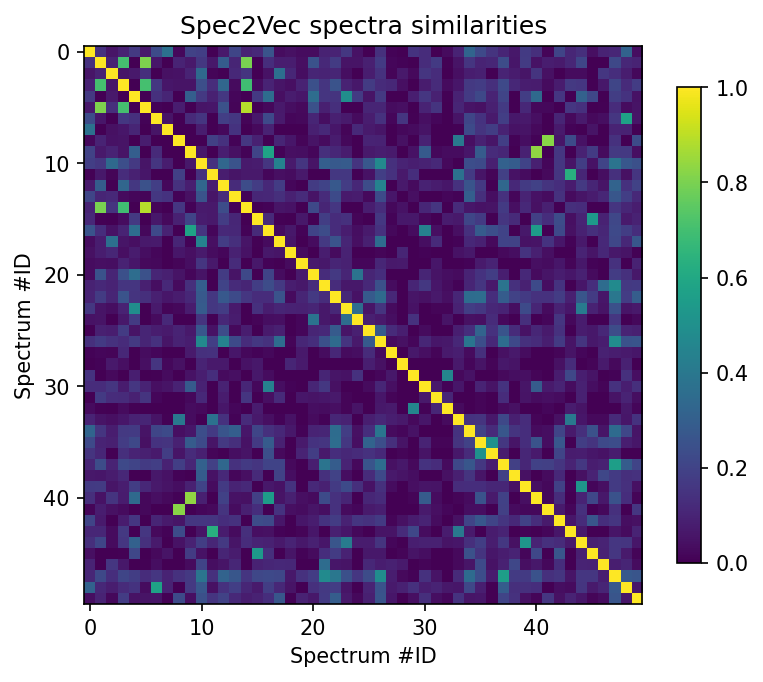

In [12]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=150)
plt.imshow(scores.scores[:50, :50], cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Spec2Vec spectra similarities")
plt.xlabel("Spectrum #ID")
plt.ylabel("Spectrum #ID")
plt.clim(0, 1)  # Spec2Vec scores can be between -1 and 1
#plt.savefig("spec2vec_scores.png")

**2. Train a new Spec2Vec model from scratch**

Training a Spec2Vec model is fairly straightforward and relatively fast (usually minutes to one hour max). In general, training a new model from scratch makes sense when a lot a data is present to train on as it gives more options to optimize the results when compared to simply using a pretrained model as done above.

First, the spectrum data has to be converted into “documents” where peaks and neutral losses have become “words” (e.g. peak@289.29). This can be done by running:

In [9]:
from spec2vec import SpectrumDocument
spectrum_documents = [SpectrumDocument(s, n_decimals=2) for s in spectrums]

Then, a new model can simply be trained by using **train_new_word2vec_model**. The following code will create a new model which is trained for 25 iterations (for machine learning people: that is ”epochs”) on 2 workers (you can change this, e.g. to 4 if you have 4 cores, the difference is not drastic though). Depending on your hardware, the training of this model should not take longer than a couple of minutes.

In [10]:
from spec2vec.model_building import train_new_word2vec_model

model_file = "tutorial_model.model"
model = train_new_word2vec_model(spectrum_documents, iterations=[25], filename=model_file,
                                 workers=2, progress_logger=True)

The value of workers is set from 4 (default) to 2
  Epoch 1 of 25.Change in loss after epoch 1: 277749.40625
  Epoch 2 of 25.Change in loss after epoch 2: 211542.78125
  Epoch 3 of 25.Change in loss after epoch 3: 197151.25
  Epoch 4 of 25.Change in loss after epoch 4: 187749.625
  Epoch 5 of 25.Change in loss after epoch 5: 179884.4375
  Epoch 6 of 25.Change in loss after epoch 6: 170316.125
  Epoch 7 of 25.Change in loss after epoch 7: 162864.375
  Epoch 8 of 25.Change in loss after epoch 8: 158618.75
  Epoch 9 of 25.Change in loss after epoch 9: 153265.75
  Epoch 10 of 25.Change in loss after epoch 10: 150022.625
  Epoch 11 of 25.Change in loss after epoch 11: 146655.625
  Epoch 12 of 25.Change in loss after epoch 12: 143371.5
  Epoch 13 of 25.Change in loss after epoch 13: 138364.75
  Epoch 14 of 25.Change in loss after epoch 14: 136589.0
  Epoch 15 of 25.Change in loss after epoch 15: 131225.75
  Epoch 16 of 25.Change in loss after epoch 16: 129824.25
  Epoch 17 of 25.Change in lo

The above code snippet will automatically save the model under the name **tutorial_model.model**, which could later load again by running **model = gensim.models.Word2Vec.load("tutorial_model.model")**.

**Calculate spectrum similarities**

Once we have our trained model we can again (as above with the pretrained model) compute spectrum similarities.

In [11]:
from matchms import calculate_scores
from spec2vec import Spec2Vec
spec2vec_similarity = Spec2Vec(model=model, intensity_weighting_power=0.5,
                               allowed_missing_percentage=5.0)
scores = calculate_scores(spectrum_documents, spectrum_documents, spec2vec_similarity, is_symmetric=True)

Here again we can search for the best matching compounds according to Spec2Vec.

In [12]:
best_matches = scores.scores_by_query(spectrum_documents[11], sort=True)[:10]
[x[0].get("smiles") for x in best_matches]

['CC(C)[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N[C@@H](CC(=O)O)C(=O)O',
 'CC(C)[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N[C@@H](CCC(=O)N)C(=O)O',
 'CCC(C)[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N[C@H](C(=O)O)c3ccccc3',
 'CCCCCC(NC(=O)C1CCN(CC1)C(=O)[C@@H](NS(=O)(=O)c2ccc(C)cc2)C(C)C)C(=O)O',
 'CC(C)C[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N[C@@H](C(C)C)C(=O)O',
 'CCC(C)[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N3CCC(CC3)C(=O)N',
 'CC(C)[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N[C@H](C(=O)O)c3ccccc3',
 'CCC(C)[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N3CCC(CC3)C(=O)OC',
 'CC(C)C[C@H](NS(=O)(=O)c1ccc(C)cc1)C(=O)N2CCC(CC2)C(=O)N[C@@H](Cc3ccccc3)C(=O)O',
 'COC(=O)C1CCN(CC1)C(=O)C2CCN(CC2)C(=O)[C@@H](NS(=O)(=O)c3ccc(C)cc3)C(C)C']

And we can plot the resulting smiles to .png files by running:

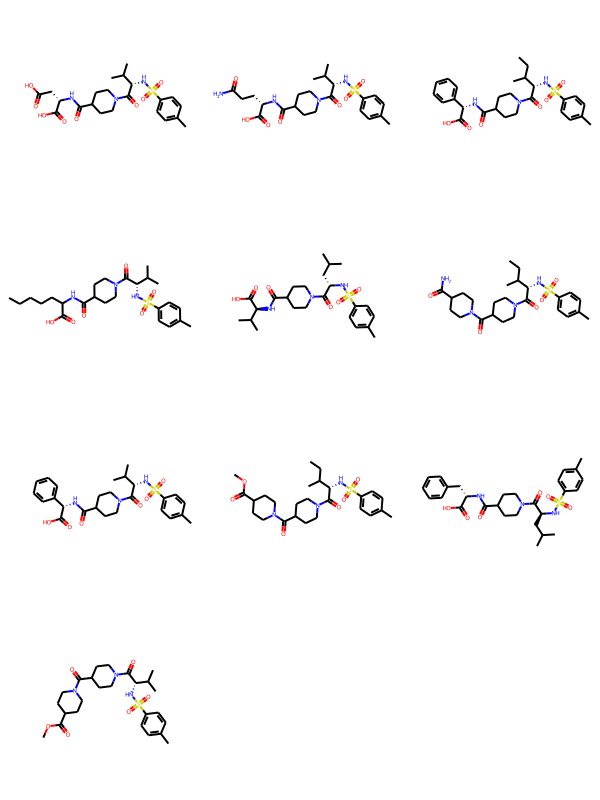

In [13]:
from rdkit import Chem
from rdkit.Chem import Draw

ms = []
for i, smiles in enumerate([x[0].get("smiles") for x in best_matches]):
    m = Chem.MolFromSmiles(smiles)
    ms.append(m)
    #Draw.MolToFile(m, f"compound_{i}.png")
    
Chem.Draw.MolsToGridImage(ms)

This example in figure 3 looks already quiet promising and all selected candidates clearly show chemical similarities! But this is of course just one mostly random pick out of many spectra. In our Spec2Vec paper we compared the different similarity scores (Cosine, modified Cosine, Spec2Vec) in much more detail and found that Spec2Vec often — but not always — outperformed the classical scores. We also found a general trend that such scores are generally more reliable for larger compounds, supposedly because those will come with a higher number of chemically meaningful fragments.